In [1]:
project_home = %env PROJECT_HOME
%cd $project_home

F:\ai_voucher\MeritOrderPrediction


In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

# Load forecasting with ARIMA

In [3]:
data = pd.read_csv("./data/load_data.csv",
                   header=[0],
                   index_col=0,
                   parse_dates=True
                  )

data.index = pd.to_datetime(data.index,
                            utc=True
                           ).tz_convert(tz="Europe/Berlin")

In [4]:
data = data["2020-01-01":"2020-01-31"].resample("1H").mean()

In [5]:
data

,load
2020-01-01 00:00:00+01:00,43494.00
2020-01-01 01:00:00+01:00,42612.50
2020-01-01 02:00:00+01:00,41488.00
2020-01-01 03:00:00+01:00,40301.75
2020-01-01 04:00:00+01:00,40296.75
...,...
2020-01-31 19:00:00+01:00,70198.25
2020-01-31 20:00:00+01:00,65729.50
2020-01-31 21:00:00+01:00,61787.25
2020-01-31 22:00:00+01:00,58895.00


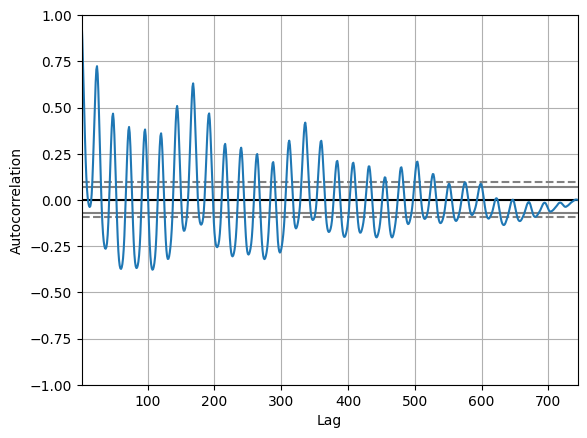

In [6]:
autocorrelation_plot(data)
plt.show()

In [7]:
# split into train and test sets
X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [8]:
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=73236.185219, expected=73399.750000
predicted=72989.685911, expected=72389.750000
predicted=71121.384244, expected=71550.000000
predicted=71157.447529, expected=70502.250000
predicted=70051.321892, expected=70067.500000
predicted=69776.640186, expected=70075.750000
predicted=70294.283161, expected=73804.250000
predicted=76587.537209, expected=74488.500000
predicted=74448.934300, expected=72641.250000
predicted=70641.695301, expected=68982.500000
predicted=67360.730921, expected=65659.750000
predicted=63582.931234, expected=62845.750000
predicted=61294.223211, expected=59307.500000
predicted=57062.795264, expected=56725.000000
predicted=55664.824612, expected=55011.000000
predicted=54615.371260, expected=53791.250000
predicted=53198.574201, expected=53820.750000
predicted=54323.217098, expected=55058.750000
predicted=56226.773900, expected=58076.500000
predicted=60163.253580, expected=65649.500000
predicted=70961.097118, expected=71162.750000
predicted=73847.141235, expected=7

predicted=63203.626791, expected=62992.250000
predicted=61685.295430, expected=59096.250000
predicted=56287.295574, expected=56750.750000
predicted=55868.263939, expected=54484.500000
predicted=53661.336432, expected=53671.000000
predicted=53420.417255, expected=54063.500000
predicted=55048.777534, expected=55690.750000
predicted=56961.634284, expected=59350.250000
predicted=62249.859313, expected=67124.250000
predicted=72942.513693, expected=73279.250000
predicted=76439.070002, expected=75492.500000
predicted=75389.372734, expected=76204.000000
predicted=76723.290603, expected=76873.250000
predicted=77059.769045, expected=77509.750000
predicted=77178.322201, expected=77365.500000
predicted=76742.904674, expected=77025.750000
predicted=76721.456987, expected=75884.500000
predicted=75037.385003, expected=74744.000000
predicted=73940.927069, expected=73666.500000
predicted=73121.780995, expected=76102.250000
predicted=78421.143496, expected=76228.750000
predicted=75779.681123, expected=7

In [10]:
from math import sqrt
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

Test RMSE: 1542.423
Test MAPE: 0.017


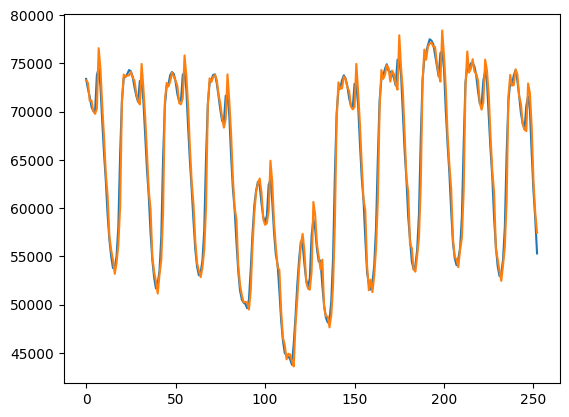

In [22]:
fig, ax = plt.subplots()
ax.plot(test)
ax.plot(predictions)

# Generation forecasting

In [44]:
data_gen = pd.DataFrame()
data_gen = pd.read_csv("./data/entsoe_gen.csv",
                   header=[0],
                   index_col=0,
                   decimal=",",
                   low_memory=False,
                  ).drop(
    ['Fossil Gas.1',
     'Fossil Oil.1',
     'Hydro Water Reservoir.1',
     'Nuclear.1',
     'Other renewable.1',
     'Solar.1',
     'Wind Onshore.1'],
    axis=1,
)

data_gen.drop(index=data_gen.index[0], axis=0, inplace=True)

data_gen.index = pd.to_datetime(data_gen.index,
                                    utc=True
                                    ).tz_convert(tz="Europe/Berlin")

In [45]:
data_gen = data_gen.astype(float)

In [46]:
data_gen = data_gen["2020-01-01":"2020-01-31"].resample("1H").mean()

In [83]:
# split into train and test sets
X = data_gen.values
size = int(len(X) * 0.66)
train, test_ = X[0:size], X[size:len(X)]
labels = data_gen.columns

Test RMSE: 29.834
Test MAPE: 0.005


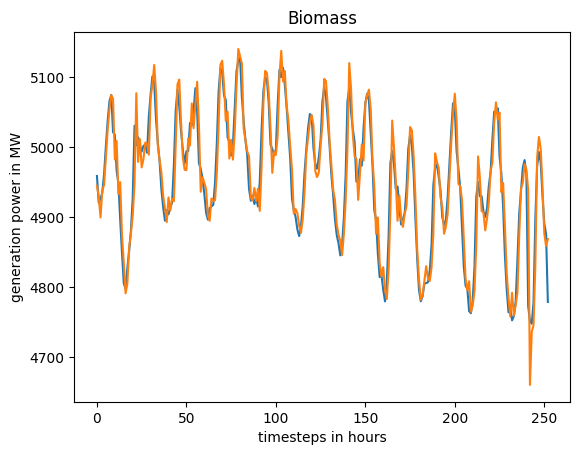

Test RMSE: 418.108
Test MAPE: 0.031


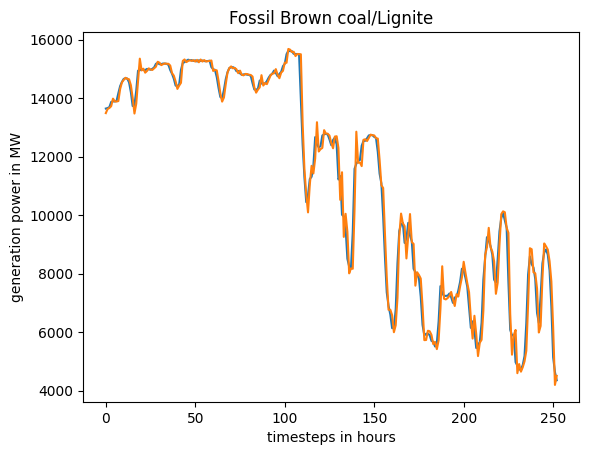

Test RMSE: 388.278
Test MAPE: 0.036


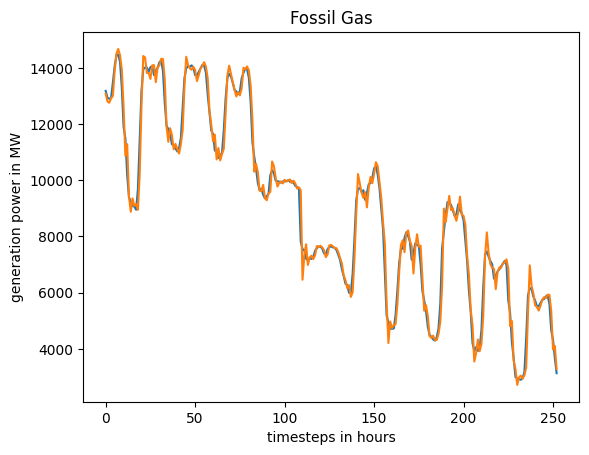

Test RMSE: 430.244
Test MAPE: 0.051


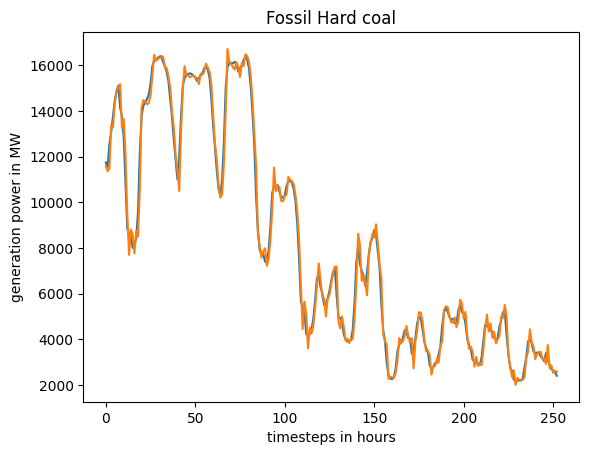

Test RMSE: 42.820
Test MAPE: 0.027


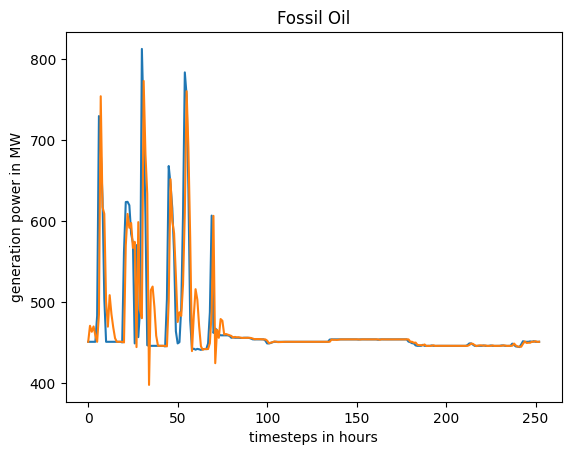

Test RMSE: 0.886
Test MAPE: 0.019


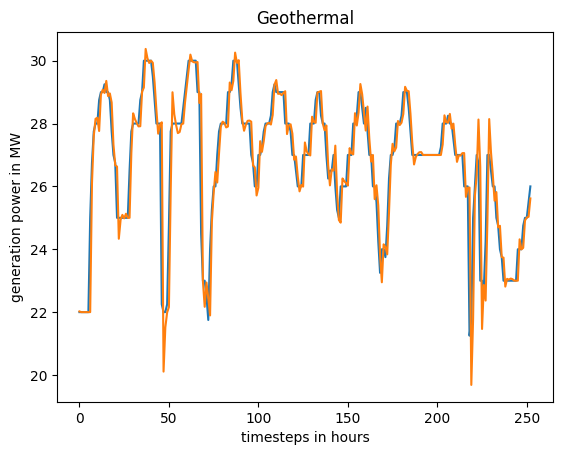

Test RMSE: 656.681
Test MAPE: 0.574


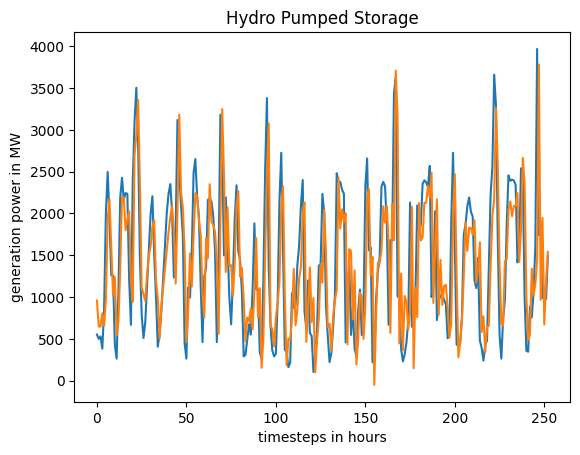

Test RMSE: 767.684
Test MAPE: 0.718


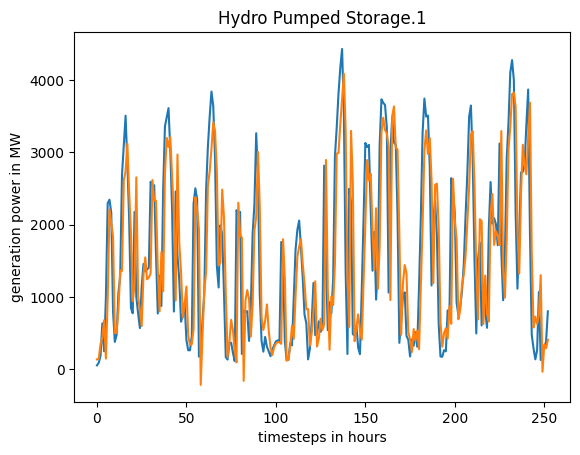

Test RMSE: 9.828
Test MAPE: 0.006


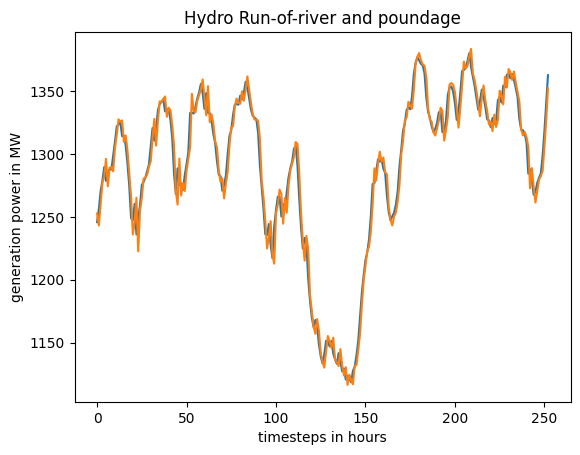

Test RMSE: 51.357
Test MAPE: 0.590


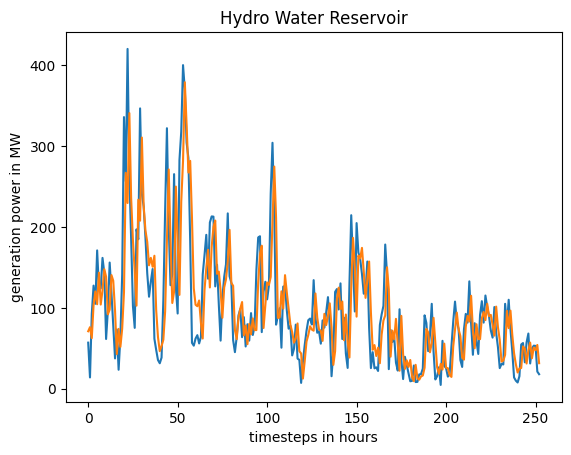

Test RMSE: 97.567
Test MAPE: 0.006


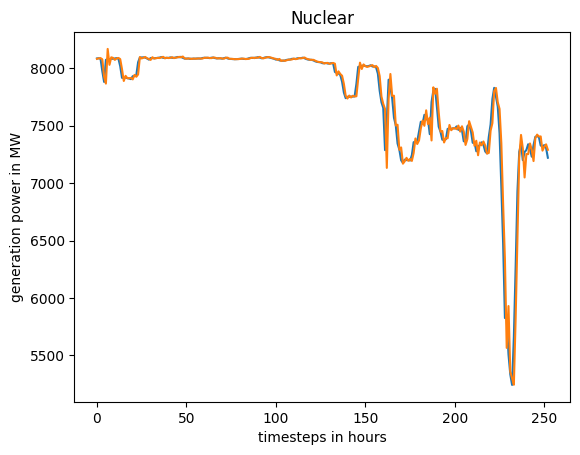

Test RMSE: 9.759
Test MAPE: 0.010


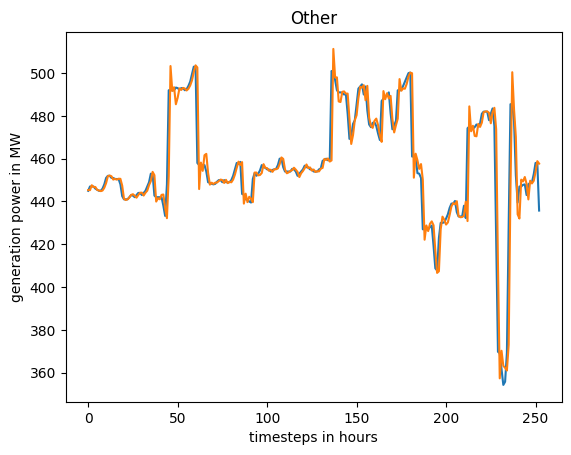

Test RMSE: 2.750
Test MAPE: 0.005


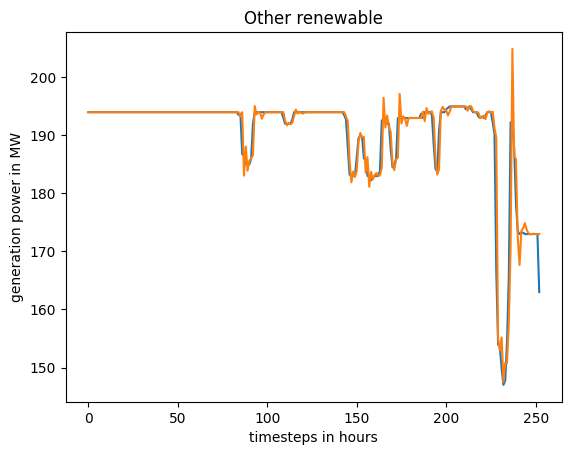

Test RMSE: 414.861
Test MAPE: 257981046380135360.000


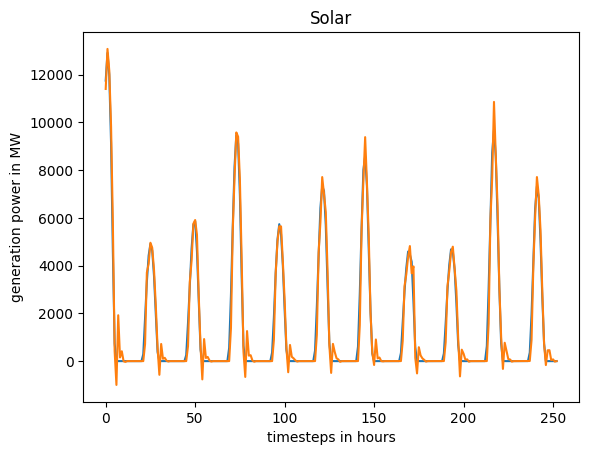

Test RMSE: 29.447
Test MAPE: 0.019


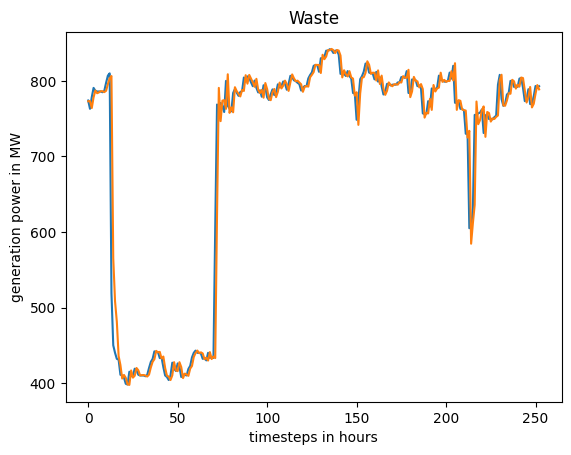

Test RMSE: 222.620
Test MAPE: 0.055


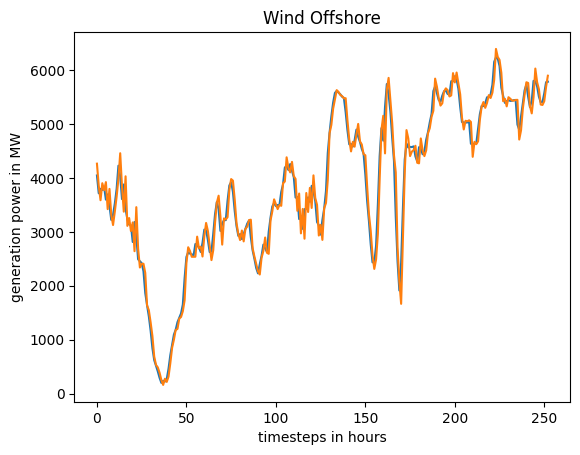

Test RMSE: 516.760
Test MAPE: 0.030


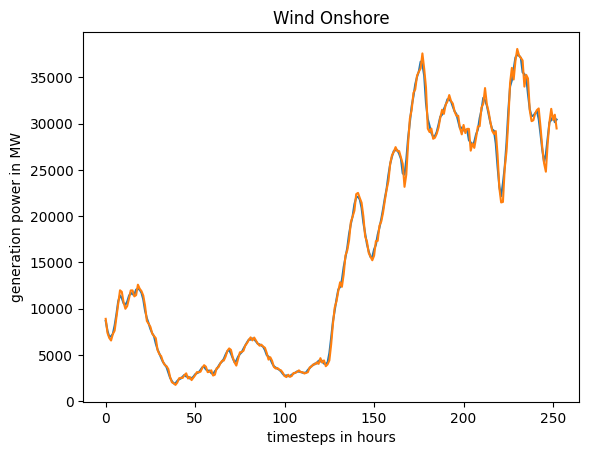

In [88]:
# walk-forward validation
for i in range(len(train.T)):
    
    history = [x for x in train[:,i]]
    test = test_[:,i]
    predictions = list()
    
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
        
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
        
    mape = mean_absolute_percentage_error(test, predictions)
    print('Test MAPE: %.3f' % mape)
    fig, ax = plt.subplots()
    ax.plot(test)
    ax.plot(predictions)
    ax.set_xlabel("timesteps in hours")
    ax.set_ylabel("generation power in MW")
    ax.set_title(labels[i])
    plt.show()